In [1]:
import numpy as np
import scipy.linalg as la
import hamiltonian as hm
%matplotlib inline
import matplotlib.pyplot as plt

In [82]:
L = 11
dense = True
if (dense):
    fix = 'dense'
else:
    fix = 'sparse'

In [83]:
if (dense):
    H = hm.dense_H(L)
    fix = 'dense'
else:
    H = hm.sparse_H(L)
    fix = 'sparse'
# vals, vecs = la.eigh(H)

In [84]:
Z = np.zeros((2**L,2**L))
for i in range(L):
    Zi = 1
    for j in range(L):
        if (j==i): Zi = np.kron(Zi,hm.Z)
        else: Zi = np.kron(Zi,hm.I)
    Z += Zi

X = np.zeros((2**L,2**L))
for i in range(L):
    Xi = 1
    for j in range(L):
        if (j==i): Xi = np.kron(Xi,hm.X)
        else: Xi = np.kron(Xi,hm.I)
    X += Xi

Y = np.zeros((2**L,2**L), dtype=complex)
for i in range(L):
    Yi = 1
    for j in range(L):
        if (j==i): Yi = np.kron(Yi,hm.Y)
        else: Yi = np.kron(Yi,hm.I)
    Y += Yi
    
# print(Z@Z)
# vals, vecs = la.eigh(Z)
# print(vals)
    
S2 = X@X + Y@Y + Z@Z
# vals2, _ = la.eigh(S2)
# print(hm.chop(S2))
# print(hm.chop(vals2))
# print(hm.chop(np.sqrt(vals2+1)-1)/2)

In [85]:
Hsmal = hm.mat2list(H)[(int)(L/2)]
Zsmal = hm.mat2list(Z)[(int)(L/2)]
Ssmal = hm.mat2list(S2)[(int)(L/2)]

In [86]:
# # eigs of Hsmal
# valsH, vecsH = la.eigh(Hsmal)
# for i, vec in enumerate(vecsH.T):
# #     a = (H@vec)
# #     a = a[np.absolute(vec) > .0001]
# #     a = a/vec[np.absolute(vec) > .0001]
# #     if np.all(np.isclose(a[0], a)): print("H:", a[0])
# #     else: print("not an eig of H")
# #     print("should be", valsH[i], '\n')
#     a = (vec.conj()@Hsmal@vec)
#     print(i, "H:", hm.chop(a), " should be", hm.chop(valsH[i]))

In [87]:
# # expectations of S2 in eigs of Hsmal
# valsH, vecsH = la.eigh(Hsmal)
# Ss = []
# for i, vec in enumerate(vecsH.T):
#     a = (Ssmal@vec)
#     a = a[np.absolute(vec) > .0001]
#     a = a/vec[np.absolute(vec) > .0001]
#     if np.all(np.isclose(a[0], a)): 
#         print(i, "S:", hm.chop(a[0]), hm.chop(vec.conj()@Ssmal@vec))
#         Ss.append(a[0])
#     else: 
#         print(str(i) + " is not an eig of S", a[0], vec[np.absolute(vec) > .0001][np.argmax(np.absolute(a - a[0]))])
# #         Ss.append(None)
# #     print("should be", valsX[i], '\n')
# #     a = (vec.conj()@Zsmal@vec)
# #     print("z:", a)

In [88]:
# # eigs of Ssmal
# valsS, vecsS = la.eigh(Ssmal)
# for i, vec in enumerate(vecsS.T):
# #     a = (H@vec)
# #     a = a[np.absolute(vec) > .0001]
# #     a = a/vec[np.absolute(vec) > .0001]
# #     if np.all(np.isclose(a[0], a)): print("H:", a[0])
# #     else: print("not an eig of H")
# #     print("should be", valsH[i], '\n')
#     a = (vec.conj()@Ssmal@vec)
#     print("S:", hm.chop(a))
# #     print(str(i) + " should be", valsH[i], '\n')

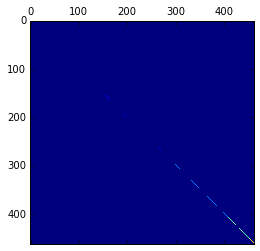

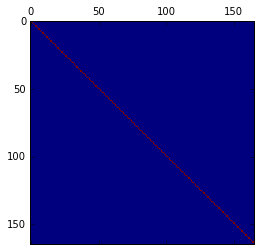

In [89]:
valsS, vecsS = la.eigh(Ssmal)
Sdiag = vecsS.conj().T@Ssmal@vecsS
# print(np.absolute(Sdiag))
plt.matshow(np.absolute(Sdiag))
plt.show()
vals = np.round(valsS).astype('int')
counts = np.bincount(vals)
mask = (vals == np.argmax(counts))
plt.matshow(np.absolute(Sdiag)[mask][:,mask])
plt.show()

In [90]:
Htiny = (vecsS.conj().T@Hsmal@vecsS)[mask][:,mask]
valsH, vecsH = la.eigh(Htiny)
print(hm.chop(valsH))
print(valsH)

[-11.168 -10.177  -9.834  -9.5    -8.899  -8.549  -8.     -7.727  -7.583
  -7.203  -6.813  -6.46   -6.451  -6.355  -6.163  -5.953  -5.94   -5.856
  -5.689  -5.526  -5.481  -5.421  -5.262  -5.217  -5.01   -4.876  -4.732
  -4.714  -4.645  -4.585  -4.39   -4.312  -4.243  -4.155  -4.004  -3.884
  -3.802  -3.771  -3.486  -3.439  -3.305  -3.17   -3.152  -2.873  -2.826
  -2.605  -2.442  -2.422  -2.395  -2.303  -2.282  -2.098  -2.073  -1.995
  -1.933  -1.812  -1.736  -1.657  -1.564  -1.497  -1.429  -1.207  -1.165
  -1.081  -0.942  -0.902  -0.871  -0.829  -0.788  -0.682  -0.622  -0.585
  -0.525  -0.408  -0.274  -0.253  -0.225  -0.169  -0.12   -0.085  -0.     -0.
  -0.      0.      0.      0.085   0.12    0.169   0.225   0.253   0.274
   0.408   0.525   0.585   0.622   0.682   0.788   0.829   0.871   0.902
   0.942   1.081   1.165   1.207   1.429   1.497   1.564   1.657   1.736
   1.812   1.933   1.995   2.073   2.098   2.282   2.303   2.395   2.422
   2.442   2.605   2.826   2.873   3.152   3.1

In [92]:
valsH = valsH[valsH > 1e-10]
delta = (valsH - np.roll(valsH, 1))[1:]
stats = np.minimum(delta, np.roll(delta, 1)) / np.maximum(delta, np.roll(delta, 1)) 

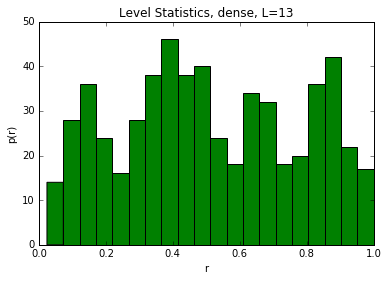

In [71]:
n, bins, patches = plt.hist(stats, 20, facecolor='green')
plt.xlabel('r')
plt.ylabel('p(r)')
plt.title("Level Statistics, " + fix + ", L=" + str(L))
plt.savefig("figures/level_stats_" + fix + "L" + str(L) + ".pdf")

In [59]:
np.save('data/level_stats_' + fix + "L" + str(L), stats)

In [68]:
stats= np.load('data/level_stats_' + fix + "L" + str(L) + '.npy')

In [81]:
np.argmax(counts)

15

In [93]:
valsH

array([  0.08506427,   0.11951498,   0.16859853,   0.22521097,
         0.25319952,   0.27357167,   0.4079227 ,   0.52542669,
         0.58483954,   0.62152256,   0.68198741,   0.78782338,
         0.82949184,   0.87148048,   0.90231599,   0.9422905 ,
         1.08124291,   1.16451962,   1.20730571,   1.42870736,
         1.49676973,   1.56424137,   1.65725005,   1.73626607,
         1.81190457,   1.93316818,   1.99468448,   2.07309707,
         2.09772869,   2.28197618,   2.30263431,   2.39516562,
         2.42165251,   2.44190188,   2.60478186,   2.82646963,
         2.87254686,   3.15249892,   3.1696662 ,   3.30511525,
         3.43922407,   3.48565508,   3.77129694,   3.80153635,
         3.88378669,   4.00443021,   4.15511066,   4.24265529,
         4.31231633,   4.38976717,   4.58518544,   4.64472868,
         4.71431027,   4.73194081,   4.8759472 ,   5.00988661,
         5.2168394 ,   5.26245063,   5.42064313,   5.48129955,
         5.52623071,   5.68882495,   5.85573257,   5.93